# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

%matplotlib inline

In [64]:
df = pd.read_csv('b1abb33c4f.csv')
df

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [65]:
df['APGAR5'] = df['APGAR5'].replace({
    0: 'asfixia grave',
    1: 'asfixia grave',
    2: 'asfixia grave',
    3: 'asfixia grave',
    4: 'asfixia moderada',
    5: 'asfixia moderada',
    6: 'asfixia leve',
    7: 'asfixia leve',
    8:  'normal',
    9:  'normal',
    10: 'normal'
})
df['GESTACAO'] = df['GESTACAO'].replace({
    1: 'Menos de 22 semanas',
    2: '22 a 27 semanas',
    3: '28 a 31 semanas',
    4: '32 a 36 semanas',
    5: '37 a 41 semanas',
    6: '42 semanas ou mais',
    9: 'Ignorado'
})

In [66]:
colunas_interesse = ['APGAR5', 'SEXO', 'GESTACAO', 'PESO']
df2 = df[colunas_interesse].copy()
df2

,APGAR5,SEXO,GESTACAO,PESO
0,normal,Masculino,37 a 41 semanas,3685
1,normal,Feminino,37 a 41 semanas,3055
2,normal,Feminino,37 a 41 semanas,3460
3,normal,Feminino,37 a 41 semanas,2982
4,normal,Feminino,37 a 41 semanas,3310
...,...,...,...,...
27023,normal,Masculino,32 a 36 semanas,2110
27024,normal,Masculino,37 a 41 semanas,3310
27025,normal,Masculino,37 a 41 semanas,3065
27026,normal,Masculino,32 a 36 semanas,2352


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

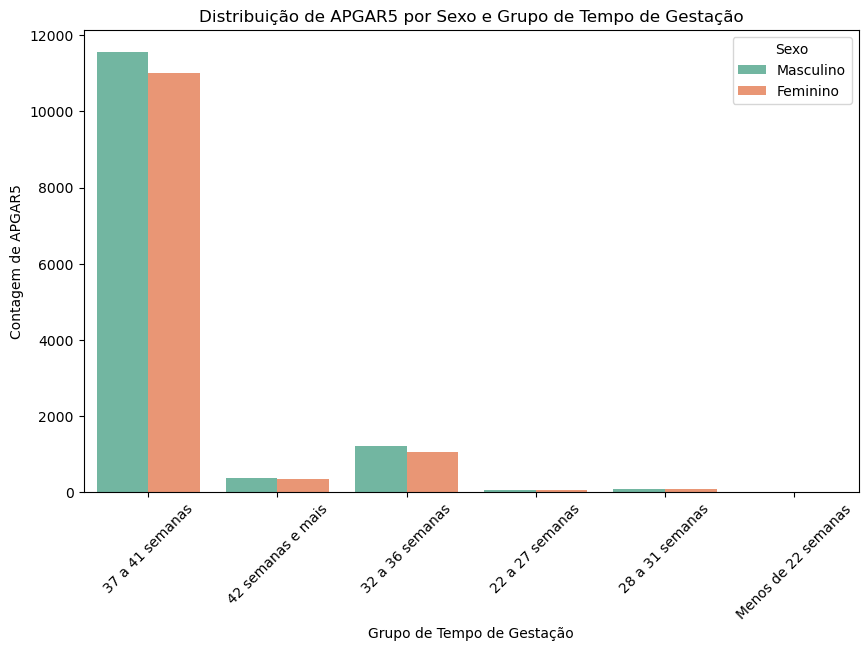

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='GESTACAO', hue='SEXO', data=df2, palette='Set2')
plt.xlabel('Grupo de Tempo de Gestação')
plt.ylabel('Contagem de APGAR5')
plt.title('Distribuição de APGAR5 por Sexo e Grupo de Tempo de Gestação')
plt.xticks(rotation=45)
plt.legend(title='Sexo', loc='upper right')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [68]:
tabela = pd.crosstab(df2['GESTACAO'], df2['APGAR5'])
tabela

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [69]:
tabela_percentual = pd.crosstab(df2['GESTACAO'], df2['APGAR5'], normalize='index')
tabela_percentual

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

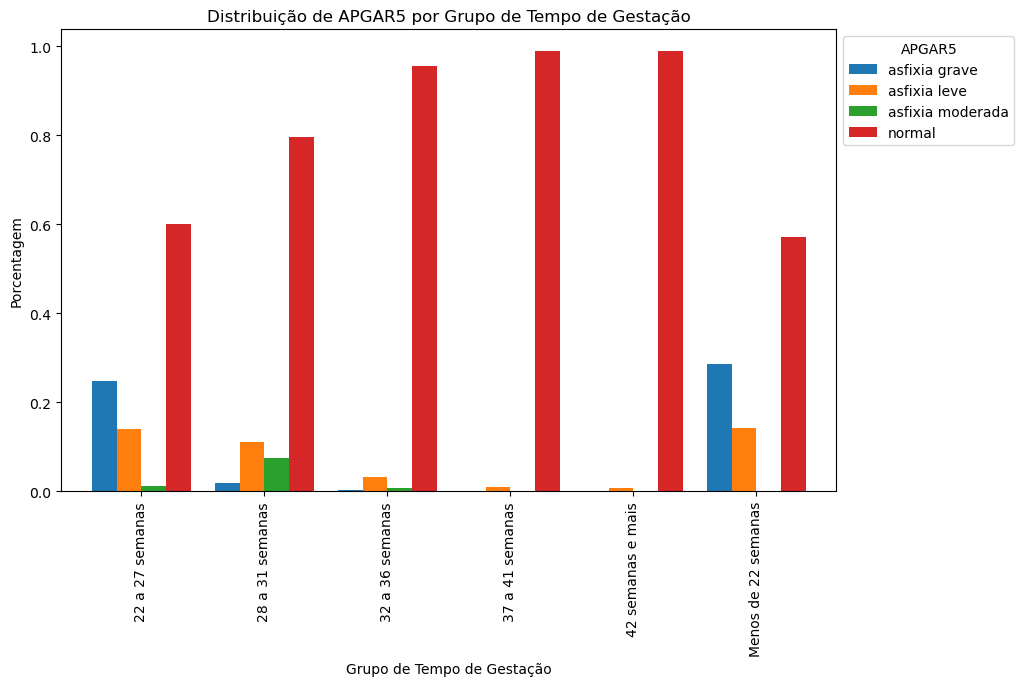

In [70]:
tabela_percentual.plot(kind='bar', figsize=(10, 6), width=0.8)  # Ajuste a largura das barras conforme necessário

plt.xlabel('Grupo de Tempo de Gestação')
plt.ylabel('Porcentagem')
plt.title('Distribuição de APGAR5 por Grupo de Tempo de Gestação')
plt.legend(title='APGAR5', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

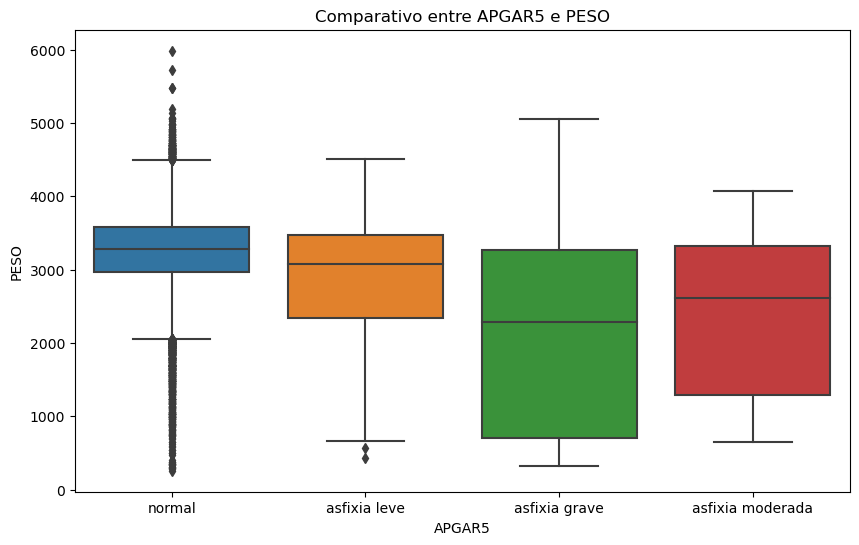

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='APGAR5', y='PESO', data=df2)
plt.xlabel('APGAR5')
plt.ylabel('PESO')
plt.title('Comparativo entre APGAR5 e PESO')
plt.show()